In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
#Reading DF
df=pd.read_csv('data.csv')

In [4]:
# First 5 rows
df.head()

Unnamed: 0     PRICE BUILD YEAR        ODO  \
0           0  2,80,000       2013  70,000 km   
1           1    65,000       2006  70,000 km   
2           2  4,35,000       2021   1,883 km   
3           3  1,90,000       2014  20,000 km   
4           4  2,95,000       2012  99,800 km   

                                               MODEL              LOC  \
0                         Chevrolet Sail 2013 Diesel  SARASWATI VIHAR   
1                    Hyundai Santro Xing 2006 Petrol             KHAN   
2           Maruti Suzuki S-Presso VXI, 2021, Petrol           KOTTAM   
3  Maruti Suzuki Alto 800 2014 Petrol Well Mainta...     CHANDA NAGAR   
4    Maruti Suzuki Swift 2011-2014 VDI, 2012, Diesel        GOTANAGAR   

         CITY  
0       DELHI  
1      MUMBAI  
2  ETTUMANOOR  
3   HYDERABAD  
4    GUWAHATI

In [5]:
# Last 5 rows
df.tail()

Unnamed: 0     PRICE BUILD YEAR         ODO  \
465         465  3,69,000       2010   83,000 km   
466         466  1,85,000       2012   79,000 km   
467         467  5,65,000       2016   56,000 km   
468         468    78,000       2004  854,329 km   
469         469  2,70,000       2018   50,000 km   

                                               MODEL                LOC  \
465         Maruti Suzuki Swift 2010 Well Maintained         KUKATPALLY   
466                           WagonR Lxi 2012 Petrol     WEST RAM NAGAR   
467             Honda BR-V i-DTEC S MT, 2016, Diesel    ROHINI SECTOR 3   
468  Hindustan Contessa 2004 Diesel 854329 Km Driven        THATHANGUDI   
469         Alto K10 July 2018 Petrol Good Condition  KNOWLEDGE PARK II   

                                    CITY  
465                            HYDERABAD  
466                              SONIPAT  
467                                DELHI  
468  THATHANKUTTAI NAGAPATTINAM DISTRICT  
469                        GREATER NOIDA

In [6]:
# Size of df
df.size

3290

In [7]:
# rows*cols in df
df.shape

(470, 7)

In [8]:
# Base information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  470 non-null    int64 
 1   PRICE       470 non-null    object
 2   BUILD YEAR  470 non-null    object
 3   ODO         470 non-null    object
 4   MODEL       470 non-null    object
 5   LOC         470 non-null    object
 6   CITY        470 non-null    object
dtypes: int64(1), object(6)
memory usage: 25.8+ KB


In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.head()

PRICE BUILD YEAR        ODO  \
0  2,80,000       2013  70,000 km   
1    65,000       2006  70,000 km   
2  4,35,000       2021   1,883 km   
3  1,90,000       2014  20,000 km   
4  2,95,000       2012  99,800 km   

                                               MODEL              LOC  \
0                         Chevrolet Sail 2013 Diesel  SARASWATI VIHAR   
1                    Hyundai Santro Xing 2006 Petrol             KHAN   
2           Maruti Suzuki S-Presso VXI, 2021, Petrol           KOTTAM   
3  Maruti Suzuki Alto 800 2014 Petrol Well Mainta...     CHANDA NAGAR   
4    Maruti Suzuki Swift 2011-2014 VDI, 2012, Diesel        GOTANAGAR   

         CITY  
0       DELHI  
1      MUMBAI  
2  ETTUMANOOR  
3   HYDERABAD  
4    GUWAHATI

In [11]:
for i in range(0,len(df)):
    if df.PRICE[i]=='ATURED':
        df.PRICE[i]='0'
        

In [12]:
df.PRICE = df.PRICE.apply(locale.atof)

In [13]:
df['PRICE']= df['PRICE'].astype(float).astype(int)

In [14]:
df.head()

PRICE BUILD YEAR        ODO  \
0  280000       2013  70,000 km   
1   65000       2006  70,000 km   
2  435000       2021   1,883 km   
3  190000       2014  20,000 km   
4  295000       2012  99,800 km   

                                               MODEL              LOC  \
0                         Chevrolet Sail 2013 Diesel  SARASWATI VIHAR   
1                    Hyundai Santro Xing 2006 Petrol             KHAN   
2           Maruti Suzuki S-Presso VXI, 2021, Petrol           KOTTAM   
3  Maruti Suzuki Alto 800 2014 Petrol Well Mainta...     CHANDA NAGAR   
4    Maruti Suzuki Swift 2011-2014 VDI, 2012, Diesel        GOTANAGAR   

         CITY  
0       DELHI  
1      MUMBAI  
2  ETTUMANOOR  
3   HYDERABAD  
4    GUWAHATI

In [15]:
df.PRICE = pd.cut(df.PRICE,bins=[0,100000,500000,1000000,2000000,999999999],labels=['<1L','1L-5L','5L-10L','10L-20L','>20L'])

In [16]:
df.head()

PRICE BUILD YEAR        ODO  \
0  1L-5L       2013  70,000 km   
1    <1L       2006  70,000 km   
2  1L-5L       2021   1,883 km   
3  1L-5L       2014  20,000 km   
4  1L-5L       2012  99,800 km   

                                               MODEL              LOC  \
0                         Chevrolet Sail 2013 Diesel  SARASWATI VIHAR   
1                    Hyundai Santro Xing 2006 Petrol             KHAN   
2           Maruti Suzuki S-Presso VXI, 2021, Petrol           KOTTAM   
3  Maruti Suzuki Alto 800 2014 Petrol Well Mainta...     CHANDA NAGAR   
4    Maruti Suzuki Swift 2011-2014 VDI, 2012, Diesel        GOTANAGAR   

         CITY  
0       DELHI  
1      MUMBAI  
2  ETTUMANOOR  
3   HYDERABAD  
4    GUWAHATI

In [17]:
df[:].isna().sum()

PRICE         73
BUILD YEAR     0
ODO            0
MODEL          0
LOC            0
CITY           0
dtype: int64

In [18]:
df.PRICE.describe()

count       397
unique        5
top       1L-5L
freq        235
Name: PRICE, dtype: object

In [19]:
df.PRICE = df.PRICE.fillna('1L-5L')

In [20]:
df[:].isna().sum()

PRICE         0
BUILD YEAR    0
ODO           0
MODEL         0
LOC           0
CITY          0
dtype: int64

In [21]:
df.describe()

PRICE BUILD YEAR  ODO                      MODEL           LOC   CITY
count     470        470  470                        470           470    470
unique      5         50  197                        430           365    161
top     1L-5L       2013  000  Hyundai i10, 2013, Petrol  PALARIVATTOM  DELHI
freq      308         43   49                          9            12     43

In [22]:
le=LabelEncoder()
for i in df:
    df[i]=le.fit_transform(df[i].astype(str))

In [23]:
X = df.drop(columns = ['PRICE'])
y = df['PRICE']

In [24]:
X

BUILD YEAR  ODO  MODEL  LOC  CITY
0            16  139     95  285    48
1             9  139    165  160    99
2            24    7    282  170    53
3            17   58    235   59    60
4            15  194    290  105    57
5            20   54    196  183   125
6            18  116    151   99   154
7            18  169    292  345    41
8            17   99    251  278    48
9             3  129    229  266   147
10            3   63    414  151    62
11           14  137    327   33    44
12           14  120    427   82    48
13           16  143    152  262    99
14           12  110    307  328    48
15           20  172    110  312   125
16            9  179    385  140    68
17           46    4     20  338     6
18           47    4     42  226     9
19           14  196    219   55   104
20           13  180    177   18    23
21           19  181    395  138    39
22           21  134    272   19    24
23           10  190    336   78    81
24           12   59    209  307    86
25            3  160    332  355   126
26           21   76    318   62    15
27           19  134    361   13    80
28           13  153    387  342    67
29           17  110    351  258    48
30           15  105    369  275   100
31           13  172    345  141    88
32           15   50    408  330   149
33           17  172    410  141    88
34           18  155    267  141    88
35           43    1     66  232    12
36           37    4     19   93     6
37           41    1     41   31     9
38           18  180    213  243    19
39           12   27    371  108   124
40           16  101    245  141    88
41           19  118    178   51    97
42            1   23    394   23    31
43           12   41    411  104    99
44           17   76    102   52    99
45           13  166    179   14    99
46           11  185    171   49    99
47           15  101    220   43   117
48           18  107    308  290   144
49           19  148    413  305    79
50           21   78    157  203    65
51           18  146    313  295    56
52           21   96    239   61    15
53           16  138    210  309    99
54           20   10    309  182    91
55           37    4     39  336     8
56           25    4      1  228     0
57           46    4     63  223    11
58           18  139    386  135   118
59           20  101    214   79   118
60           21   69    402  175   156
61           16   83    426  165    48
62           15   46    279  175   156
63           20  128    425  327    76
64           15  146    208  315    48
65            7   49    338   15   119
66           19   58    304  236    15
67           19  120    342   81   124
68           18   26    344   81   124
69           22  147    106   95   104
70           12  120    347  288    48
71           11  112    356  288    48
72           12   24     80  179    99
73           20   61    135  115    32
74           14  134    129  179    99
75           29    1     38  234     8
76           33    1     58  339    11
77           30  178     91   97    49
78           22  101    302   56    47
79            6  139    127  156    33
80           12  174    230  159   106
81           21  165    104  235   144
82           18  125    154  235   144
83           18   89    234  323    51
84            5    5    382   53    83
85           11  174    370   53    83
86           10  168    227  149   151
87           20  167    217   53    83
88           15   10    290   25    60
89           10    5    207   53    83
90           14   65    412   53    83
91           16   83    426  264    48
92           17   94    132  277    48
93           22    3     87  298    40
94           22   30    293   29   148
95           37    4     57  213    11
96           32    4     23  358     6
97           46    4     60  225    11
98           14  139    422  107    48
99           17  160    424   68   124
100          11  160    315   84    48
101          21   61     82

In [25]:
y

0      1
1      3
2      1
3      1
4      1
5      1
6      2
7      1
8      1
9      3
10     1
11     1
12     1
13     2
14     1
15     4
16     3
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     3
26     2
27     1
28     1
29     1
30     1
31     1
32     2
33     2
34     2
35     1
36     1
37     1
38     2
39     1
40     1
41     1
42     3
43     2
44     1
45     1
46     1
47     1
48     1
49     0
50     1
51     1
52     1
53     2
54     2
55     1
56     1
57     1
58     1
59     1
60     2
61     1
62     1
63     2
64     1
65     3
66     2
67     0
68     4
69     2
70     1
71     2
72     2
73     2
74     1
75     1
76     1
77     1
78     2
79     3
80     1
81     2
82     1
83     1
84     3
85     1
86     1
87     2
88     1
89     1
90     2
91     1
92     2
93     4
94     2
95     1
96     1
97     1
98     1
99     1
100    1
101    4
102    0
103    1
104    1
105    1
106    1
107    1
108    1
109    2
110    2
1

In [26]:
# Treating data imbalance
from imblearn.over_sampling import ADASYN
from collections import Counter

In [27]:
counter = Counter(y)
print(counter)
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({1: 308, 2: 96, 3: 42, 0: 15, 4: 9})
Counter({1: 308, 4: 307, 0: 306, 2: 304, 3: 301})


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_scaled

array([[-0.16212423,  0.72293761, -1.09172525,  0.86766734, -0.70607288],
       [-1.1539977 ,  0.72293761, -0.48737057, -0.41770835,  0.65777582],
       [ 0.97144544, -1.76213499,  0.5227651 , -0.3148783 , -0.57236223],
       ...,
       [ 0.82974923, -0.293683  , -0.98812159, -0.46912338, -0.81304141],
       [ 0.4046606 ,  1.32537945, -0.96222067,  1.12474248,  1.32632911],
       [ 0.82974923, -0.95260376, -1.04855706,  0.06559291, -0.89326781]])

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns

In [31]:
vif

vif    Features
0  1.366221  BUILD YEAR
1  1.185099         ODO
2  1.298735       MODEL
3  1.048110         LOC
4  1.194176        CITY

In [32]:
X_scaled.shape

(1526, 5)

<AxesSubplot:>

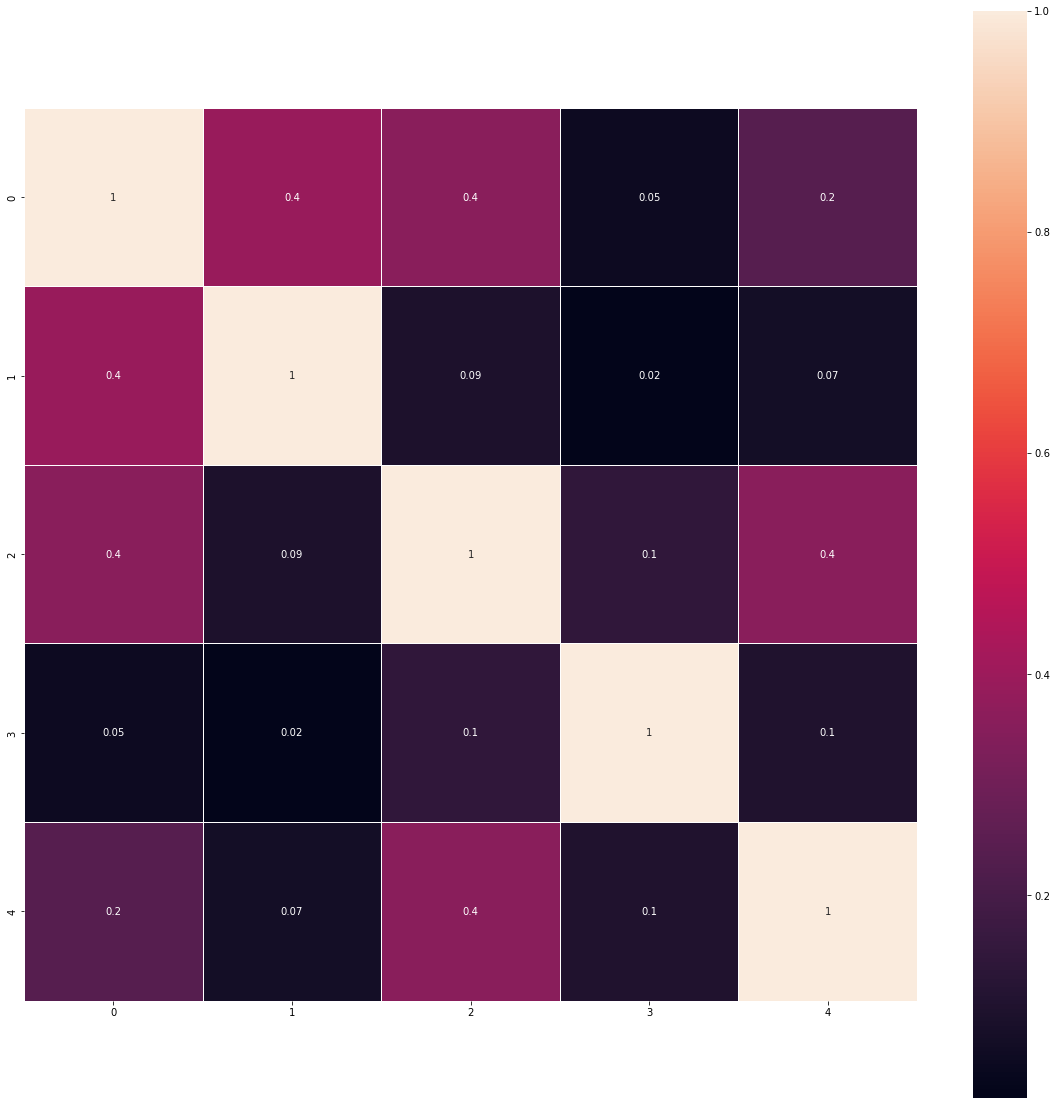

In [33]:
df_n = pd.DataFrame(X_scaled)
df_corr=df_n.corr().abs()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True,square=True,fmt='.1g',linewidth=1)

In [ ]:
df_n.describe()

In [ ]:
for column in df_n.columns:
    print(df_n[column].value_counts())

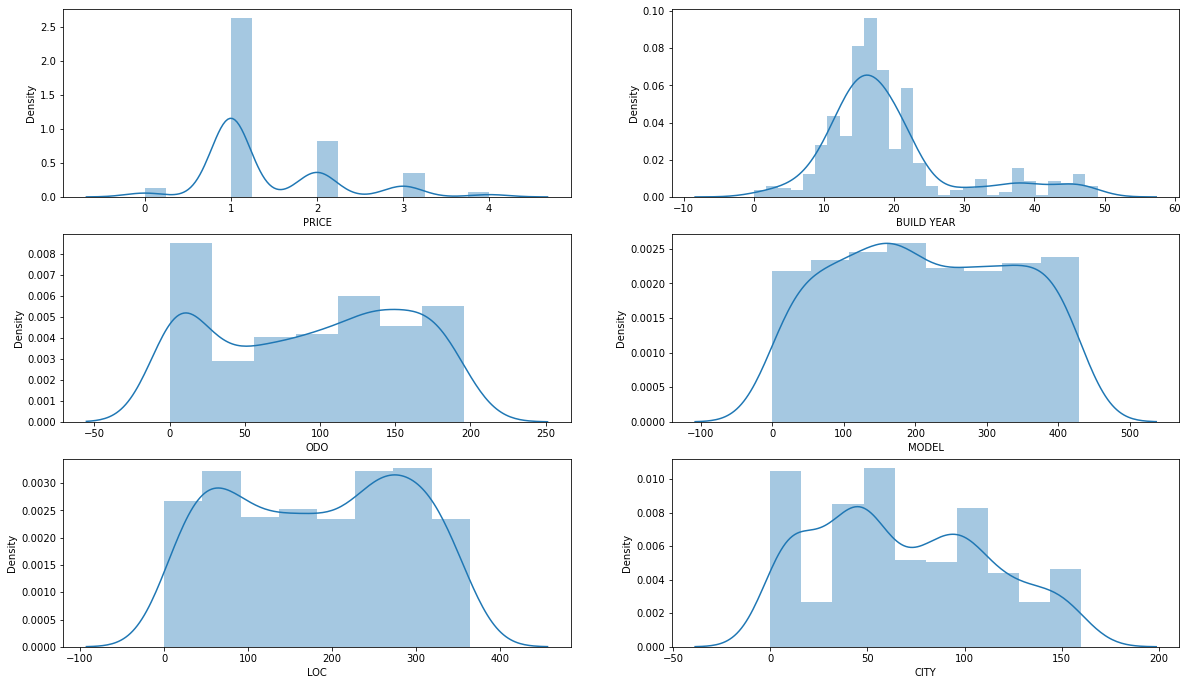

In [38]:
#Distribution of the df
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

In [35]:
df.head()

PRICE  BUILD YEAR  ODO  MODEL  LOC  CITY
0      1          16  139     95  285    48
1      3           9  139    165  160    99
2      1          24    7    282  170    53
3      1          17   58    235   59    60
4      1          15  194    290  105    57

In [39]:
#Removing outliers using zscore
z=np.abs(stats.zscore(df))
np.where(z>3)

(array([ 15,  68,  93, 101, 133, 174, 193, 231, 289, 386, 409, 413, 416,
        420], dtype=int64),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64))

In [40]:
df.shape

(470, 6)

In [41]:
# Dropping rows where z>3
index=(np.where(z>3)[0])
df=df.drop(df.index[index])

In [42]:
df.shape

(456, 6)

In [43]:
# Skew values before treatment
df.skew()

PRICE         1.038057
BUILD YEAR    1.368671
ODO          -0.124329
MODEL        -0.001019
LOC          -0.041711
CITY          0.283881
dtype: float64

In [44]:
# Treating Skew
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(X)

In [46]:
# Skew values after treatment
data_new=pd.DataFrame(data_new,columns=X.columns)
data_new.skew()

BUILD YEAR    0.170111
ODO          -0.375552
MODEL        -0.127286
LOC          -0.335420
CITY         -0.125650
dtype: float64

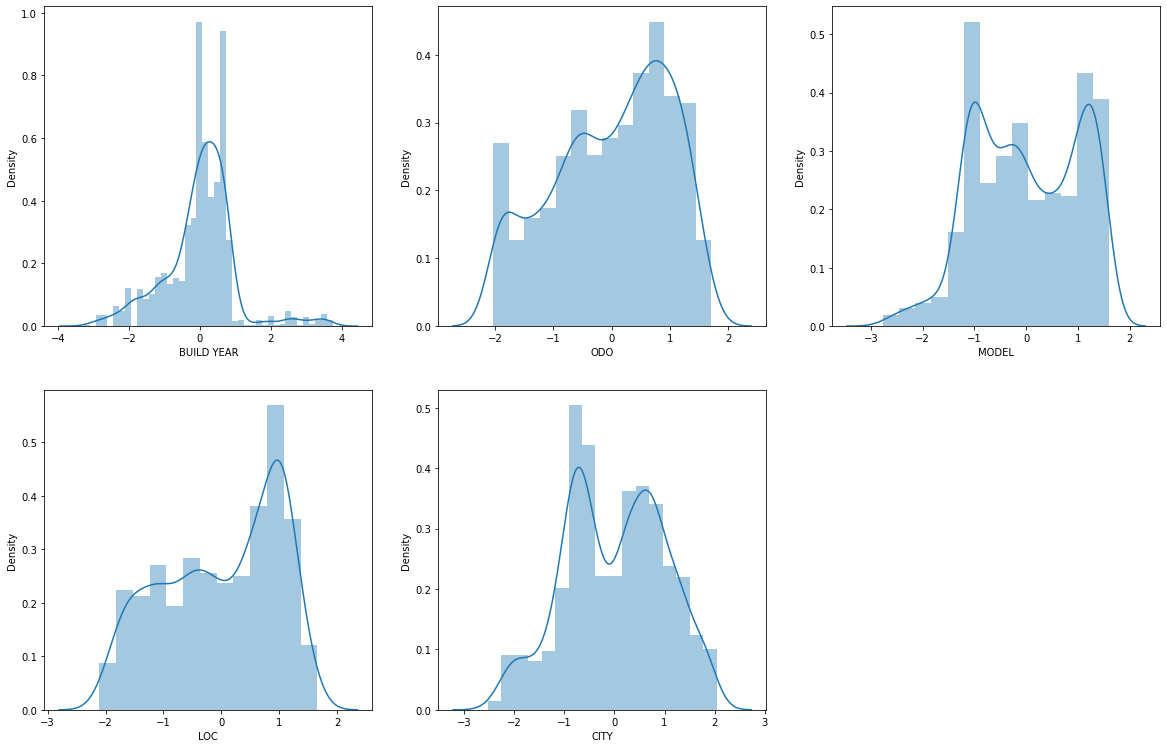

In [47]:
# Distibution after fixing skew and outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

In [50]:
x = data_new

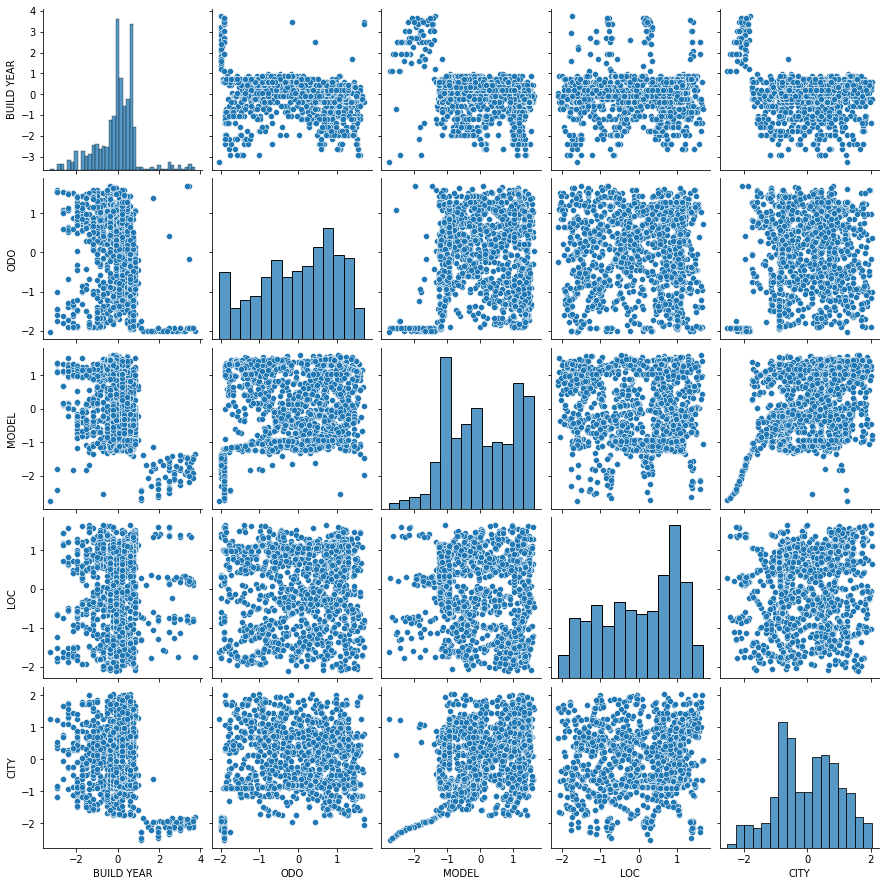

In [51]:
# Pairplot of df
sns.pairplot(x)

## MODEL

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [56]:
#Classifiers :
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC(probability=True)

m_list = [knn,dt,rf,svm]

In [57]:
# Fitting Models
for m in m_list:
    m.fit(x_train,y_train)
#     Training------->>>>>
    print(m)
    train_preds = m.predict(x_train)
    print('Accuracy Score :',accuracy_score(y_train,train_preds)*100)
    
#     Testing------->>>>>>
    print(m)
    test_preds = m.predict(x_test)
    te_acc = accuracy_score(y_test,test_preds)*100
    print('Accuracy Score :',accuracy_score(y_test,test_preds)*100)
    
    
#     CV-------->>>>>
    print('cross validation scores below:--  \n',m)
    scr=cross_val_score(m,x,y,cv=5)
    print('Cross validation score : ',scr.mean()*100)
    print('Difference between CV_score and acc : ',(te_acc-scr.mean()*100))
    print('\n')
    print('\n')

KNeighborsClassifier()
Accuracy Score : 87.84965034965036
KNeighborsClassifier()
Accuracy Score : 79.84293193717278
cross validation scores below:--  
 KNeighborsClassifier()
Cross validation score :  77.39076395585556
Difference between CV_score and acc :  2.452167981317217




DecisionTreeClassifier()
Accuracy Score : 100.0
DecisionTreeClassifier()
Accuracy Score : 82.19895287958116
cross validation scores below:--  
 DecisionTreeClassifier()
Cross validation score :  77.1288974606236
Difference between CV_score and acc :  5.070055418957551




RandomForestClassifier()
Accuracy Score : 100.0
RandomForestClassifier()
Accuracy Score : 89.26701570680629
cross validation scores below:--  
 RandomForestClassifier()
Cross validation score :  83.35283402978678
Difference between CV_score and acc :  5.9141816770195135




SVC(probability=True)
Accuracy Score : 80.15734265734265
SVC(probability=True)
Accuracy Score : 78.27225130890052
cross validation scores below:--  
 SVC(probability=True)


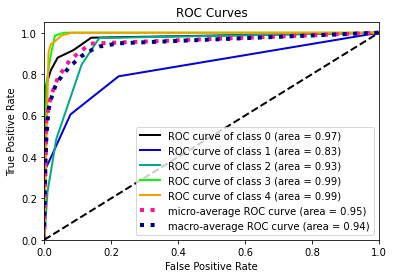

In [59]:
import scikitplot as skplt

probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

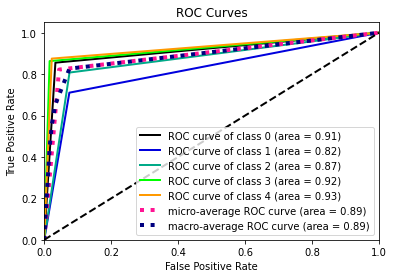

In [60]:
probas=dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

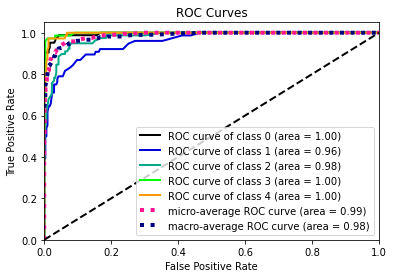

In [61]:
probas=rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

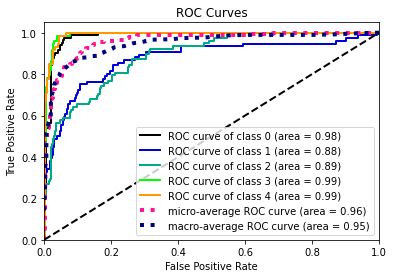

In [62]:
probas=svm.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

## Hyper-Parameter Tuning (HPT)

In [75]:
# Parameter Grid
grid_param={'criterion':['gini','entropy'],
            'max_depth':range(1,26),
            'min_samples_leaf':range(1,50),
            'min_samples_split':range(1,50)}

In [76]:
grid_search=GridSearchCV(dt,param_grid=grid_param,cv=5,n_jobs=15,verbose = 1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 120050 candidates, totalling 600250 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=9, min_samples_leaf=22,
                                              min_samples_split=10),
             n_jobs=15,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 26),
                         'min_samples_leaf': range(1, 50),
                         'min_samples_split': range(1, 50)},
             verbose=1)

In [77]:
# Best Parameters
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [78]:
# Model Fitted with best Parameters
dt=DecisionTreeClassifier(criterion='gini', max_depth=17, min_samples_leaf=1, min_samples_split=2)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [79]:
accuracy_score(y_test,y_pred)*100

80.10471204188482

In [80]:
# Classification report of Best model
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

0          1          2          3          4  accuracy  \
precision   0.845238   0.689189   0.707317   0.913043   0.863014  0.801047   
recall      0.855422   0.671053   0.743590   0.863014   0.875000  0.801047   
f1-score    0.850299   0.680000   0.725000   0.887324   0.868966  0.801047   
support    83.000000  76.000000  78.000000  73.000000  72.000000  0.801047   

            macro avg  weighted avg  
precision    0.803560      0.802338  
recall       0.801616      0.801047  
f1-score     0.802318      0.801427  
support    382.000000    382.000000

In [81]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

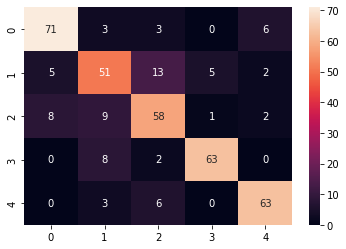

In [82]:
sns.heatmap(cm,annot=True,fmt='d')
plt.savefig('heatmap.png')
plt.show()

## Model Saving

In [83]:
import joblib

joblib.dump(dt,'DT_best.obj')

['DT_best.obj']

In [84]:
joblib.load('DT_best.obj')

DecisionTreeClassifier(max_depth=17)